In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import CPTAC.Endometrial as en

Welcome to the CPTAC data service package. Available datasets may be
viewed using CPTAC.list_data(). In order to access a specific data
set, import a CPTAC subfolder using either 'import CPTAC.Dataset' or
'from CPTAC import Dataset'.
******
Version: 0.3.0
******
Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Acetylation Proteomics Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


In [2]:
der_molecular = en.get_derived_molecular()
proteomics = en.get_proteomics()

In [3]:
der_molecular.columns.tolist()

['Proteomics_TMT_batch',
 'Proteomics_TMT_plex',
 'Proteomics_TMT_channel',
 'Proteomics_Parent_Sample_IDs',
 'Proteomics_Aliquot_ID',
 'Proteomics_OCT',
 'Estrogen_Receptor',
 'Estrogen_Receptor_%',
 'Progesterone_Receptor',
 'Progesterone_Receptor_%',
 'MLH1',
 'MLH2',
 'MSH6',
 'PMS2',
 'p53',
 'Other_IHC_specify',
 'MLH1_Promoter_Hypermethylation',
 'EPIC_Bcells',
 'EPIC_CAFs',
 'EPIC_CD4_Tcells',
 'EPIC_CD8_Tcells',
 'EPIC_Endothelial',
 'EPIC_Macrophages',
 'EPIC_NKcells',
 'EPIC_otherCells',
 'CIBERSORT_B _cells _naive',
 'CIBERSORT_B _cells _memory',
 'CIBERSORT_Plasma _cells',
 'CIBERSORT_T _cells _CD8',
 'CIBERSORT_T _cells _CD4 _naive',
 'CIBERSORT_T _cells _CD4 _memory _resting',
 'CIBERSORT_T _cells _CD4 _memory _activated',
 'CIBERSORT_T _cells _follicular _helper',
 'CIBERSORT_T _cells _regulatory _(Tregs)',
 'CIBERSORT_T _cells _gamma _delta',
 'CIBERSORT_NK _cells _resting',
 'CIBERSORT_NK _cells _activated',
 'CIBERSORT_Monocytes',
 'CIBERSORT_Macrophages _M0',
 'CIBE

In [4]:
der_molecular['MSI_status'].unique()

array(['MSI-H', 'MSS', nan], dtype=object)

In [6]:
# question: no attribute error
merged_data = en.append_derived_molecular_to_omics(derived_molecular_cols='MSI_status', omics_df=proteomics)
#merged_data = en.append_clinical_or_derived_molecular_to_omics(df_cols='MSI_status', omics_df=proteomics)

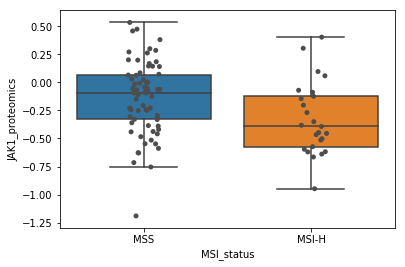

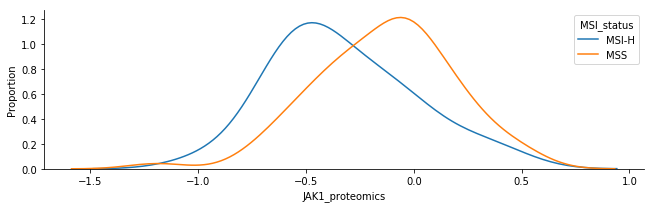

In [7]:
msi_boxplot = sns.boxplot(x='MSI_status', y='JAK1_proteomics', data = merged_data, showfliers = False, order = ['MSS', 'MSI-H'])
msi_boxplot = sns.stripplot(x='MSI_status', y='JAK1_proteomics', data = merged_data, color = '.3', order = ['MSS', 'MSI-H'])
plt.show()

msi_histogram = sns.FacetGrid(merged_data[['MSI_status', 'JAK1_proteomics']], hue="MSI_status", legend_out=False, aspect = 3)
msi_histogram = msi_histogram.map(sns.kdeplot, "JAK1_proteomics").add_legend(title="MSI_status")
msi_histogram.set(ylabel='Proportion')
plt.show()